# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [1]:
from plotnine import ggplot, geom_point, aes, geom_boxplot, geom_histogram
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [3]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [4]:
df["am"] = df["am"].astype(str)

# Convert the other variables below
df["vs"] = df["vs"].astype(str)
df["gear"] = df["gear"].astype(str)
df["carb"] = df["carb"].astype(str)
df["cyl"] = df["cyl"].astype(str)


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

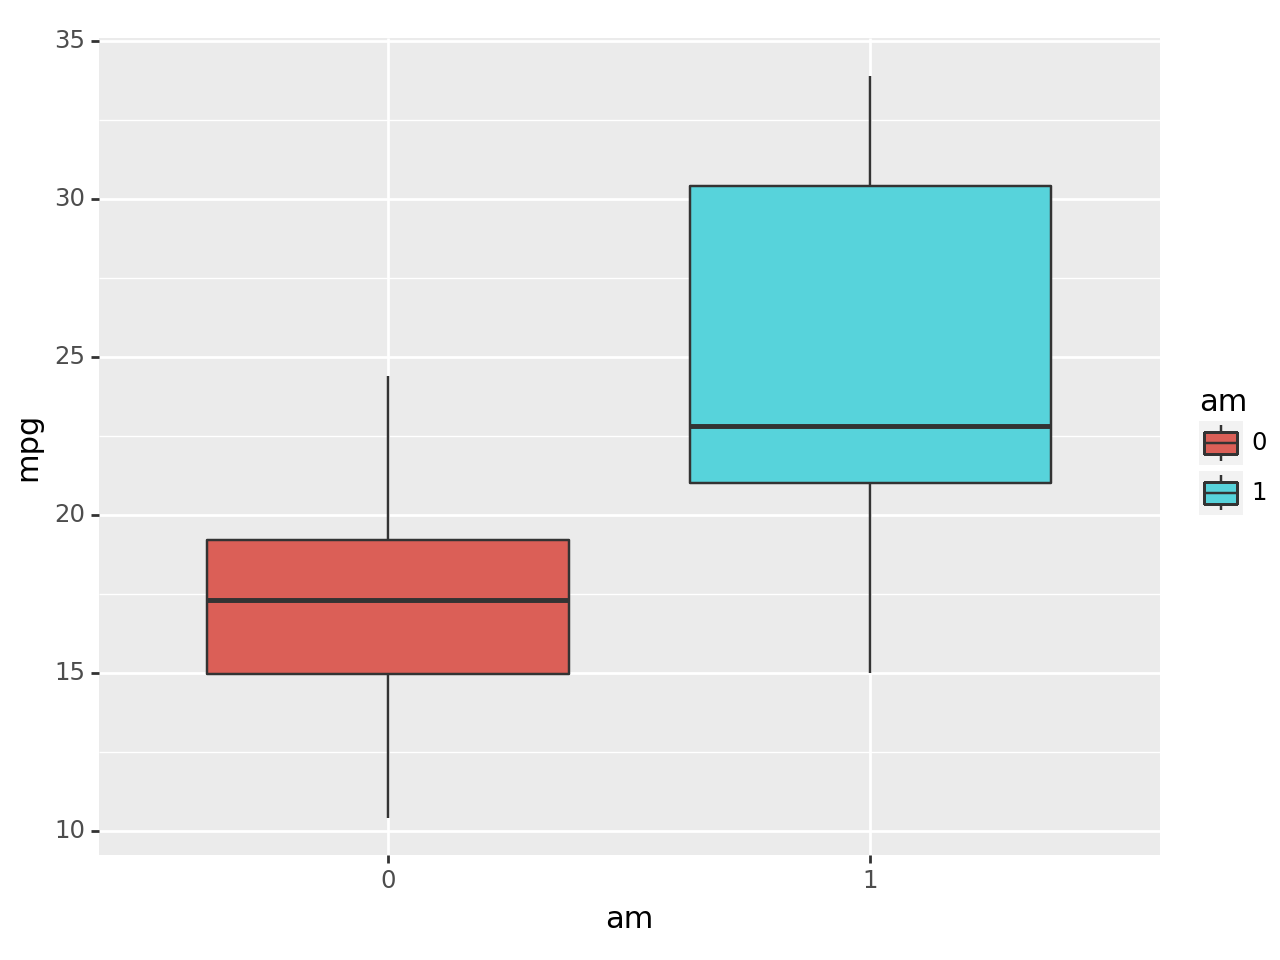

<Figure Size: (640 x 480)>

In [5]:
# Create plot for (1) here
(ggplot(df,
aes(
  x = "am",
  y = "mpg",
  fill = "am"))
+ geom_boxplot()
)

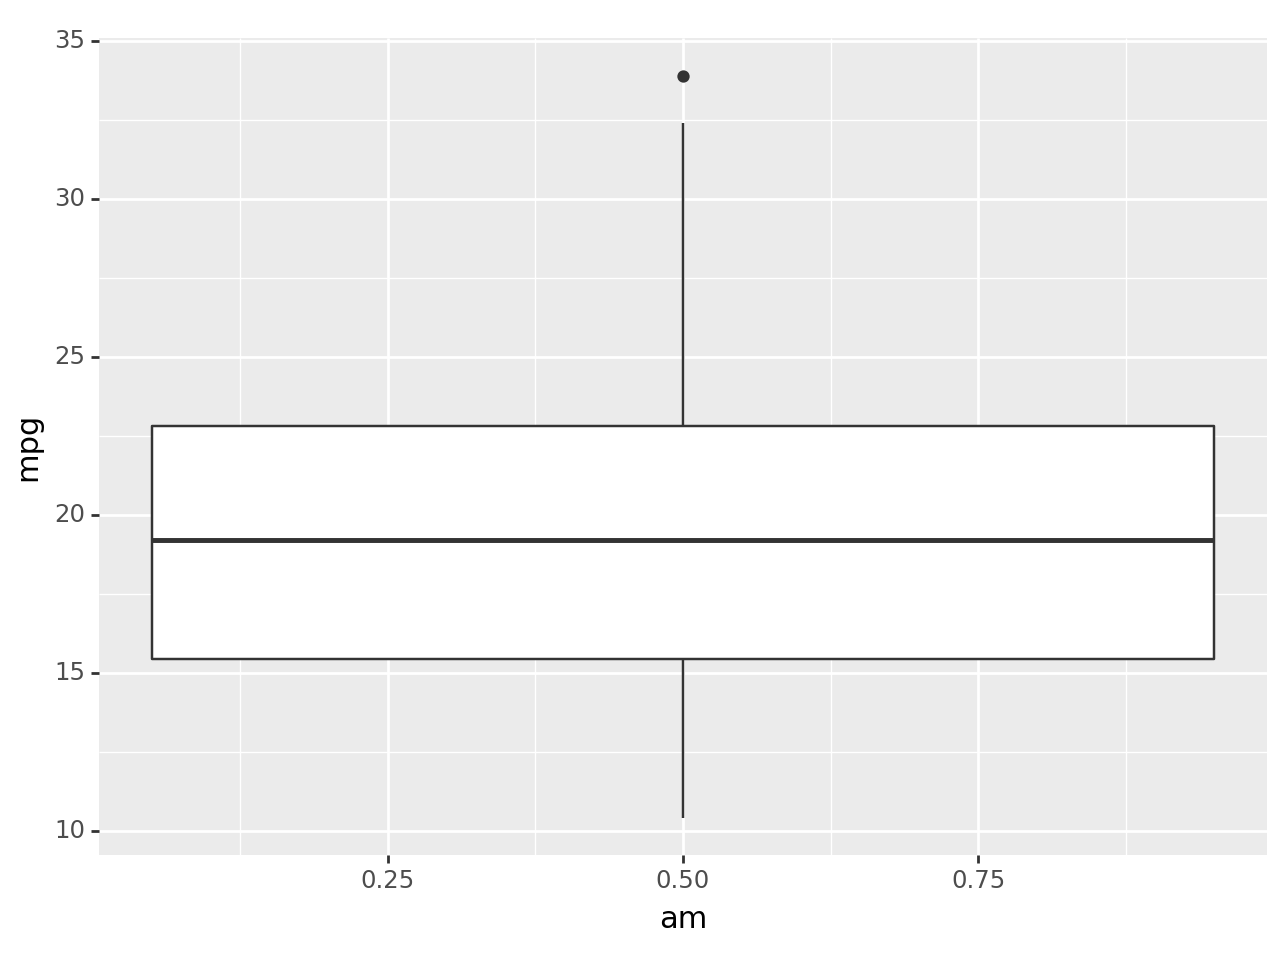

<Figure Size: (640 x 480)>

In [7]:
df["am"] = df["am"].astype(float)

(ggplot(df,
aes(
  x = "am",
  y = "mpg",
  fill = "am"))
+ geom_boxplot()
)



EXPLANATION OF WHY YOU DON'T WANT TO USE FLOAT FOR A VARIABLE THAT IS BETTER USED AS A STRING. When you convert the variable am back to a float it simply takes the values from 0 to 1 as the distribution of the data by that variable quantity, it is not taking into account that the 0 and 1 correspond to two categories.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


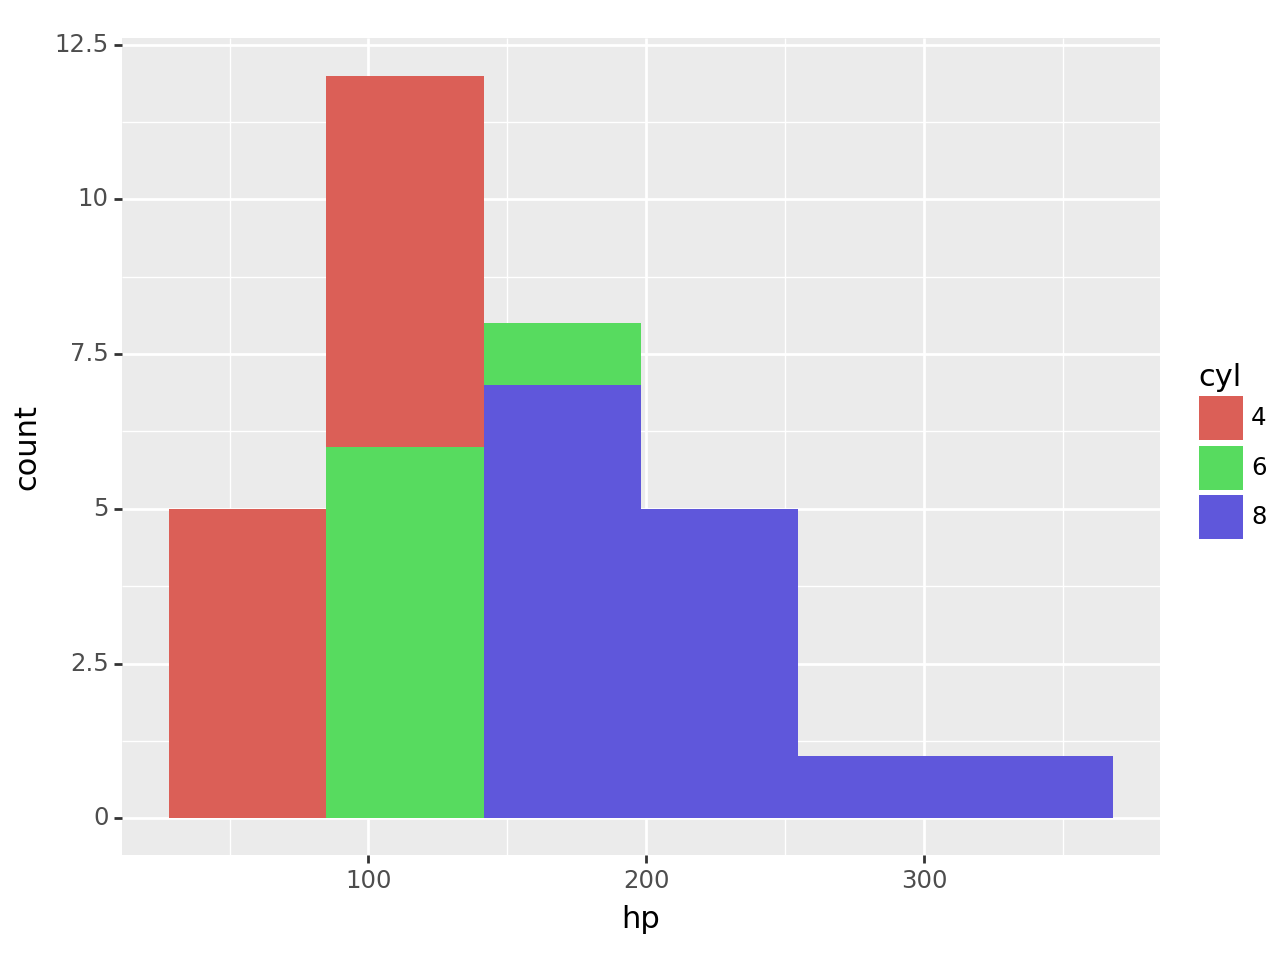

<Figure Size: (640 x 480)>

In [ ]:
# Create plot for (2) here
(ggplot(df,
aes(
  x = "hp",
  fill = "cyl"
))
+ geom_histogram()
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


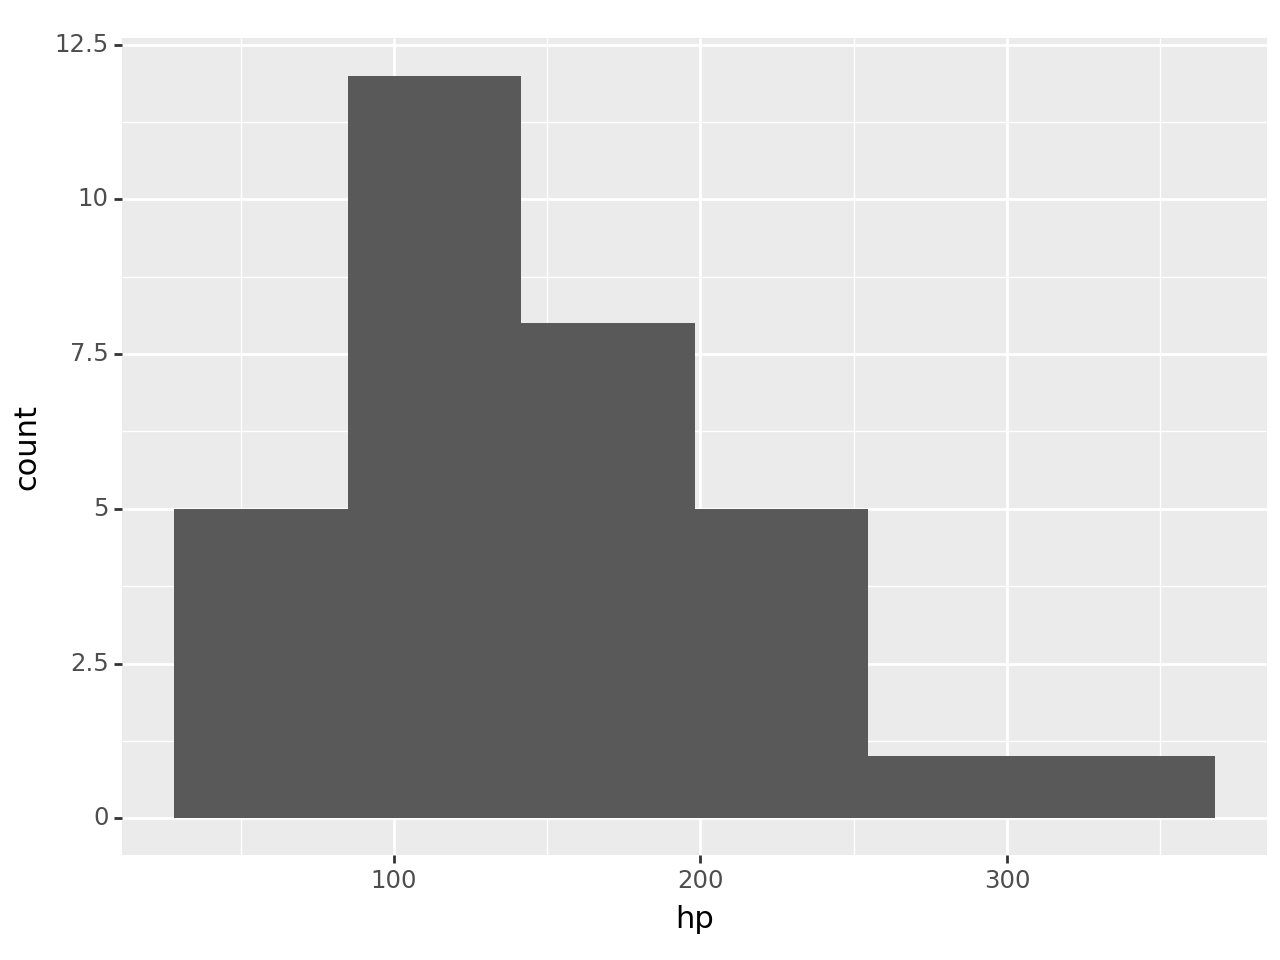

<Figure Size: (640 x 480)>

In [8]:
#Doing the same plot but with hp cyl as float
df["cyl"] = df["cyl"].astype(float)
(ggplot(df,
aes(
  x = "hp",
  fill = "cyl"
))
+ geom_histogram()
)

SIMILAR EXPLANATION TO THE PREVIOUS as to why you wouldn't want to have cyl as numerical, however, here, it actually jeopardizes the plot even more as there is no distinction in the histograms anymore.

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

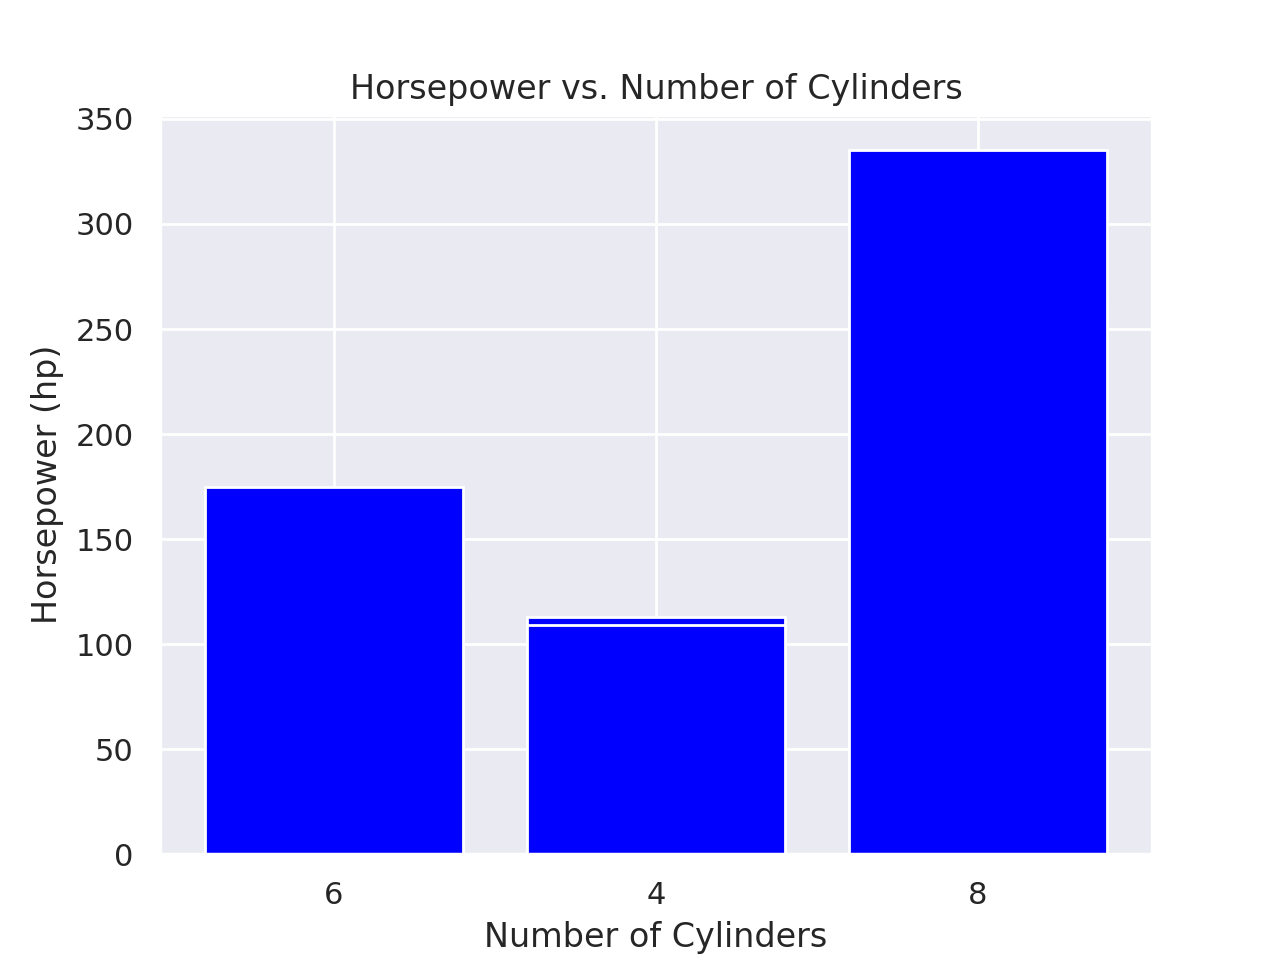

In [ ]:
# Create plot with first new geometry here

#Setting color of bars to favorite color
bars = plt.bar(df['cyl'], df['hp'], color='blue')

#Adding labels to the plot for clarity
plt.xlabel('Number of Cylinders')
plt.ylabel('Horsepower (hp)')
plt.title('Horsepower vs. Number of Cylinders')

# Show the plot
plt.show()

<Axes: xlabel='disp', ylabel='mpg'>

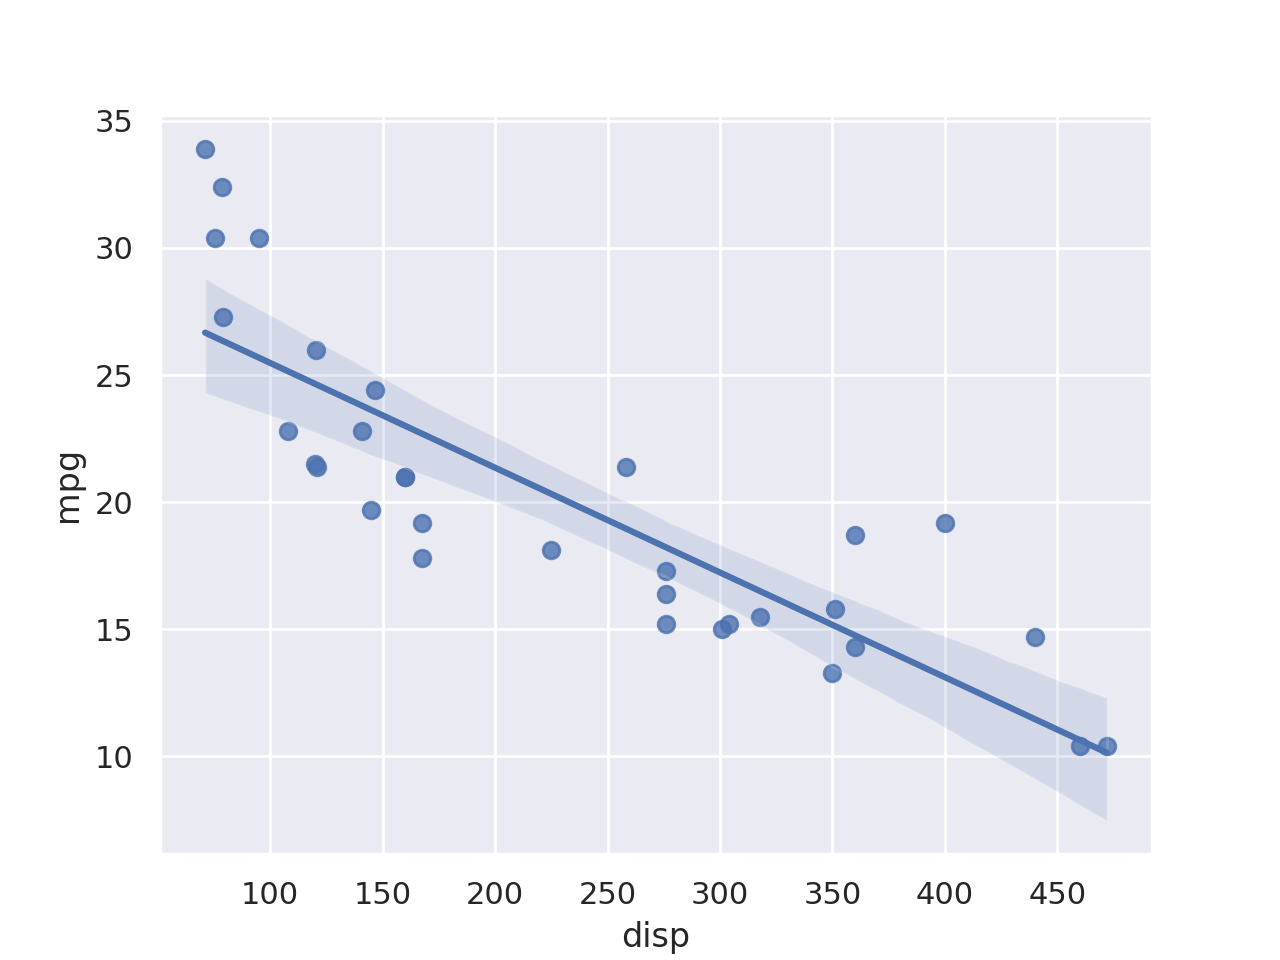

In [ ]:
# Create plot with second new geometry here
#RESOURCE https://python-graph-gallery.com/scatter-plot/

sns.regplot(x=df["disp"], y=df["mpg"])

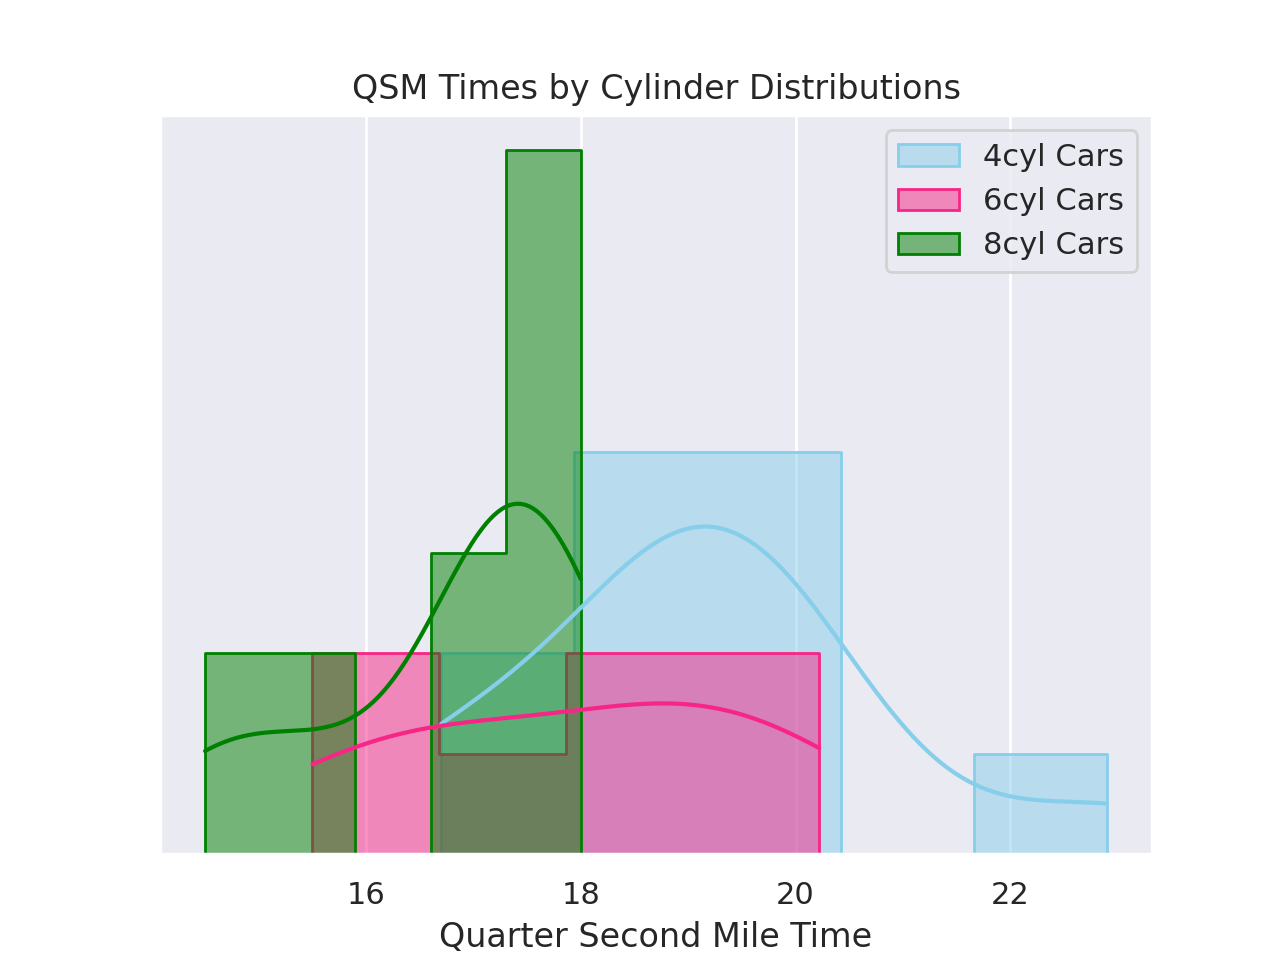

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
#Resource https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
#Assisted by Chat GPT

sns.set(style="darkgrid")

# Hide the y-axis labels and ticks
plt.yticks([])

# Set labels and title
plt.xlabel('Quarter Second Mile Time')
plt.title('QSM Times by Cylinder Distributions')

sns.histplot(data=df[df['cyl'] == '4'], x='qsec', color="skyblue", label="4cyl Cars", kde=True, element="step")
sns.histplot(data=df[df['cyl'] == '6'], x='qsec', color="#F72585", label="6cyl Cars", kde=True, element="step")
sns.histplot(data=df[df['cyl'] == '8'], x='qsec', color="green", label="8cyl Cars", kde=True, element="step")



plt.legend()
plt.show()